# Import

In [1]:
import os, time
import itertools, imageio, pickle

from numpy import array


#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
print(tf.__version__)


print(tf.test.is_gpu_available())

import numpy as np
import matplotlib.pyplot as plt

#import tensorflow_transform as tft

import matplotlib.gridspec as gridspec

import scipy

sizePixel1 = 512
sizePixel2 = sizePixel1*sizePixel1

size_d = 32

lda = 10.0

batch_size = 20
train_epoch = 100

folder = '/home/ah2347/PNGs'

pngLocation = 'Fixed_results_con'

2.7.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [3]:
def read_tensor_from_image_file(path, input_height=sizePixel1, input_width=sizePixel1, input_mean=0, input_std=255):
    
    input_name = "file_reader"
    output_name = "normalized"
    file_reader = tf.read_file(path, input_name)
    image_reader = tf.image.decode_png(file_reader, channels = 1)
    float_caster = tf.cast(image_reader, tf.float32)
    dims_expander = tf.expand_dims(float_caster, 0);
    resized = tf.image.resize_bilinear(dims_expander, [input_height, input_width])
    normalized = tf.divide(tf.subtract(resized, [input_mean]), [input_std])
    sess = tf.Session()
    result = sess.run(normalized)
    return result 


In [4]:
nSeries = 222
numInSeries = 11
nImages = nSeries*numInSeries #2442
img  = np.zeros((nImages, sizePixel1,sizePixel1))

'''
for i in range(1,nImages+1):
    print(i)
    fname = 'Untitled' +str(i) + '.png'
    path = folder + '/' + fname
    orig_img = read_tensor_from_image_file(path)
    img[i-1] = orig_img.reshape(-1)
'''

counter = 0
for j in range(0,numInSeries):
    for i in range(1,nSeries+1):
        print(counter,i,j)
        fname = str(i) + '_' + str(j) + '.png'
        path = folder + '/' + fname
        orig_img = read_tensor_from_image_file(path)
        # vectorize
        #img[counter] = orig_img.reshape(-1)
        
        # original size
        img[counter] = orig_img.reshape(sizePixel1,sizePixel1)
        counter = counter+1

#img.shape

0 1 0
1 2 0
2 3 0
3 4 0
4 5 0
5 6 0
6 7 0
7 8 0
8 9 0
9 10 0
10 11 0
11 12 0
12 13 0
13 14 0
14 15 0
15 16 0
16 17 0
17 18 0
18 19 0
19 20 0
20 21 0
21 22 0
22 23 0
23 24 0
24 25 0
25 26 0
26 27 0
27 28 0
28 29 0
29 30 0
30 31 0
31 32 0
32 33 0
33 34 0
34 35 0
35 36 0
36 37 0
37 38 0
38 39 0
39 40 0
40 41 0
41 42 0
42 43 0
43 44 0
44 45 0
45 46 0
46 47 0
47 48 0
48 49 0
49 50 0
50 51 0
51 52 0
52 53 0
53 54 0
54 55 0
55 56 0
56 57 0
57 58 0
58 59 0
59 60 0
60 61 0
61 62 0
62 63 0
63 64 0
64 65 0
65 66 0
66 67 0
67 68 0
68 69 0
69 70 0
70 71 0
71 72 0
72 73 0
73 74 0
74 75 0
75 76 0
76 77 0
77 78 0
78 79 0
79 80 0
80 81 0
81 82 0
82 83 0
83 84 0
84 85 0
85 86 0
86 87 0
87 88 0
88 89 0
89 90 0
90 91 0
91 92 0
92 93 0
93 94 0
94 95 0
95 96 0
96 97 0
97 98 0
98 99 0
99 100 0
100 101 0
101 102 0
102 103 0
103 104 0
104 105 0
105 106 0
106 107 0
107 108 0
108 109 0
109 110 0
110 111 0
111 112 0
112 113 0
113 114 0
114 115 0
115 116 0
116 117 0
117 118 0
118 119 0
119 120 0
120 121 0
121 122 

874 209 3
875 210 3
876 211 3
877 212 3
878 213 3
879 214 3
880 215 3
881 216 3
882 217 3
883 218 3
884 219 3
885 220 3
886 221 3
887 222 3
888 1 4
889 2 4
890 3 4
891 4 4
892 5 4
893 6 4
894 7 4
895 8 4
896 9 4
897 10 4
898 11 4
899 12 4
900 13 4
901 14 4
902 15 4
903 16 4
904 17 4
905 18 4
906 19 4
907 20 4
908 21 4
909 22 4
910 23 4
911 24 4
912 25 4
913 26 4
914 27 4
915 28 4
916 29 4
917 30 4
918 31 4
919 32 4
920 33 4
921 34 4
922 35 4
923 36 4
924 37 4
925 38 4
926 39 4
927 40 4
928 41 4
929 42 4
930 43 4
931 44 4
932 45 4
933 46 4
934 47 4
935 48 4
936 49 4
937 50 4
938 51 4
939 52 4
940 53 4
941 54 4
942 55 4
943 56 4
944 57 4
945 58 4
946 59 4
947 60 4
948 61 4
949 62 4
950 63 4
951 64 4
952 65 4
953 66 4
954 67 4
955 68 4
956 69 4
957 70 4
958 71 4
959 72 4
960 73 4
961 74 4
962 75 4
963 76 4
964 77 4
965 78 4
966 79 4
967 80 4
968 81 4
969 82 4
970 83 4
971 84 4
972 85 4
973 86 4
974 87 4
975 88 4
976 89 4
977 90 4
978 91 4
979 92 4
980 93 4
981 94 4
982 95 4
983 96 4
984 9

1670 117 7
1671 118 7
1672 119 7
1673 120 7
1674 121 7
1675 122 7
1676 123 7
1677 124 7
1678 125 7
1679 126 7
1680 127 7
1681 128 7
1682 129 7
1683 130 7
1684 131 7
1685 132 7
1686 133 7
1687 134 7
1688 135 7
1689 136 7
1690 137 7
1691 138 7
1692 139 7
1693 140 7
1694 141 7
1695 142 7
1696 143 7
1697 144 7
1698 145 7
1699 146 7
1700 147 7
1701 148 7
1702 149 7
1703 150 7
1704 151 7
1705 152 7
1706 153 7
1707 154 7
1708 155 7
1709 156 7
1710 157 7
1711 158 7
1712 159 7
1713 160 7
1714 161 7
1715 162 7
1716 163 7
1717 164 7
1718 165 7
1719 166 7
1720 167 7
1721 168 7
1722 169 7
1723 170 7
1724 171 7
1725 172 7
1726 173 7
1727 174 7
1728 175 7
1729 176 7
1730 177 7
1731 178 7
1732 179 7
1733 180 7
1734 181 7
1735 182 7
1736 183 7
1737 184 7
1738 185 7
1739 186 7
1740 187 7
1741 188 7
1742 189 7
1743 190 7
1744 191 7
1745 192 7
1746 193 7
1747 194 7
1748 195 7
1749 196 7
1750 197 7
1751 198 7
1752 199 7
1753 200 7
1754 201 7
1755 202 7
1756 203 7
1757 204 7
1758 205 7
1759 206 7
1760 207 7

2426 207 10
2427 208 10
2428 209 10
2429 210 10
2430 211 10
2431 212 10
2432 213 10
2433 214 10
2434 215 10
2435 216 10
2436 217 10
2437 218 10
2438 219 10
2439 220 10
2440 221 10
2441 222 10


# Generator module

In [5]:
def lrelu(x, th=0.2):
    return tf.maximum(th * x, x)

In [6]:
# G(z)
def generator(x, isTrain=True, reuse=False):
    with tf.variable_scope('generator', reuse=reuse):
        
        print('')
        print('inside generator')
        print('================')
        print('x')
        print(x.get_shape())

        # 1st hidden layer
        conv1 = tf.layers.conv2d_transpose(x, size_d*2*2*2*2*2*2, [4, 4], strides=(1, 1), padding='valid')
        lrelu1 = lrelu(tf.layers.batch_normalization(conv1, training=isTrain), 0.2)
        print('conv1')
        print(conv1.get_shape())
        
        # 2nd hidden layer
        conv2 = tf.layers.conv2d_transpose(lrelu1, size_d*2*2*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training=isTrain), 0.2)
        print('conv2')
        print(conv2.get_shape())
        
        # 3rd hidden layer
        conv3 = tf.layers.conv2d_transpose(lrelu2, size_d*2*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu3 = lrelu(tf.layers.batch_normalization(conv3, training=isTrain), 0.2)
        print('conv3')
        print(conv3.get_shape())
        
        
        # 4th hidden layer
        conv4 = tf.layers.conv2d_transpose(lrelu3, size_d*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu4 = lrelu(tf.layers.batch_normalization(conv4, training=isTrain), 0.2)
        print('conv4')
        print(conv4.get_shape())
        
        # 5th hidden layer
        conv5 = tf.layers.conv2d_transpose(lrelu4, size_d*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu5 = lrelu(tf.layers.batch_normalization(conv5, training=isTrain), 0.2)
        print('conv5')
        print(conv5.get_shape())
        
        # 6th hidden layer
        conv6 = tf.layers.conv2d_transpose(lrelu5, size_d*2, [5, 5], strides=(2, 2), padding='same')
        lrelu6 = lrelu(tf.layers.batch_normalization(conv6, training=isTrain), 0.2)
        print('conv6')
        print(conv6.get_shape())
        
        # 7th hidden layer
        conv7 = tf.layers.conv2d_transpose(lrelu6, size_d, [5, 5], strides=(2, 2), padding='same')
        lrelu7 = lrelu(tf.layers.batch_normalization(conv7, training=isTrain), 0.2)
        print('conv7')
        print(conv7.get_shape())
        
        # output layer
        conv8 = tf.layers.conv2d_transpose(lrelu7, 1, [5, 5], strides=(2, 2), padding='same')
        o = tf.nn.tanh(conv8)
        print('conv8')
        print(conv8.get_shape())
        print(o.get_shape())
        print('-----------------')
        return o

# Discriminator module

In [7]:
# D(x)
def discriminator(x, isTrain=True, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        
        print('')
        print('inside discriminator')
        print('====================')
        print('x')
        print(x.get_shape())
        
        # 1st hidden layer
        conv1 = tf.layers.conv2d(x, size_d, [5, 5], strides=(2, 2), padding='same')
        print('conv1')
        print(conv1.get_shape())
        lrelu1 = lrelu(conv1, 0.2)

        # 2nd hidden layer
        conv2 = tf.layers.conv2d(lrelu1, size_d*2, [5, 5], strides=(2, 2), padding='same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training=isTrain), 0.2)
        print('conv2')
        print(conv2.get_shape())

        # 3rd hidden layer
        conv3 = tf.layers.conv2d(lrelu2, size_d*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu3 = lrelu(tf.layers.batch_normalization(conv3, training=isTrain), 0.2)
        print('conv3')
        print(conv3.get_shape())
        
        # 4th hidden layer
        conv4 = tf.layers.conv2d(lrelu3, size_d*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu4 = lrelu(tf.layers.batch_normalization(conv4, training=isTrain), 0.2)
        print('conv4')
        print(conv4.get_shape())
        
        # 5th hidden layer
        conv5 = tf.layers.conv2d(lrelu4, size_d*2*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu5 = lrelu(tf.layers.batch_normalization(conv5, training=isTrain), 0.2)
        print('conv5')
        print(conv5.get_shape())
        
        # 6th hidden layer
        conv6 = tf.layers.conv2d(lrelu5, size_d*2*2*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu6 = lrelu(tf.layers.batch_normalization(conv6, training=isTrain), 0.2)
        print('conv6')
        print(conv6.get_shape())
        
        # 7th hidden layer
        conv7 = tf.layers.conv2d(lrelu6, size_d*2*2*2*2*2*2, [5, 5], strides=(2, 2), padding='same')
        lrelu7 = lrelu(tf.layers.batch_normalization(conv7, training=isTrain), 0.2)
        print('conv7')
        print(conv7.get_shape())

        # output layer
        conv8 = tf.layers.conv2d(lrelu7, 1, [4, 4], strides=(1, 1), padding='valid')
        o = tf.nn.sigmoid(conv8)
        print('conv8')
        print(conv8.get_shape())
        print(o.get_shape())
        print('-----------------')
        return o, conv8


# Generate samples function

# Plotting samples

In [8]:
def plot_sample(samples, size1, size2):
    
    fig1 = plt.figure(figsize=(size1, size2))
    gs = gridspec.GridSpec(size1, size2)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(512, 512), cmap='gray')

    return fig1

In [9]:
fixed_z_ = np.random.normal(0, 1, (50, 1, 1, 100))



def show_result(num_epoch, show = False, save = False, path = 'result.png'):
    
    
    test_images = sess.run(G_z, {z: fixed_z_, isTrain: False})

    size_figure_grid = 2
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize = (5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (512, 512)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()



In [10]:
def show_train_hist(hist, show = False, save = False, path = 'Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

# Compute Score

In [11]:
def compute_score(imgSample): 
    
    tmp1 = tf.reshape(imgSample,[sizePixel1,sizePixel1])
    reverted = np.ones(tmp1.shape) - tmp1
    label_im, nb_labels = scipy.ndimage.label(reverted)
    sizes = scipy.ndimage.sum(reverted.get_shape().as_list(), label_im, range(nb_labels + 1))
    total = tf.reduce_sum(reverted)
    
    return sizes.max()/total

# Faciliate the path defining process

In [12]:
# Though it's not possible to get the path to the notebook by __file__, os.path is still very useful in dealing with paths and files
# In this case, we can use an alternative: pathlib.Path
"""
code_dir   = os.path.dirname(__file__)
"""


#get the current path of our code
code_dir = '/home/ah2347/'
print("--------------------------")
code_dir
print(code_dir)
print("--------------------------")
#create output_dir within the same path
output_dir = code_dir + 'outputConGANs/'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)


--------------------------
/home/ah2347/
--------------------------


In [13]:
def next_batch(data, num):
    
    '''
    Return a total of `num` random samples 
    '''
    
    #print(len(data))
    
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = array([data[ i] for i in idx])

    return data_shuffle

# Build GAN with defined vars and functions

In [14]:
# training parameters
lr = 0.0002


# variables : input
x = tf.placeholder(tf.float32, shape=(None, 512, 512, 1))
z = tf.placeholder(tf.float32, shape=(None, 1, 1, 100))
isTrain = tf.placeholder(dtype=tf.bool)


# networks : generator
G_z = generator(z, isTrain)

scores = []
#scores = np.zeros(batch_size)
for i in range(batch_size):
    #print(i)
    #print(compute_score(G_z[i]))
    #scores[i] = 1.05-compute_score(G_z[i])
    scores.append(compute_score(G_z[i]+0.05))
    #print(scores)
scores_1 = tf.convert_to_tensor(scores)




inside generator
x
(?, 1, 1, 100)
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
conv1
(?, 4, 4, 2048)
conv2
(?, 8, 8, 1024)
conv3
(?, 16, 16, 512)
conv4
(?, 32, 32, 256)
conv5
(?, 64, 64, 128)
conv6
(?, 128, 128, 64)
conv7
(?, 256, 256, 32)
conv8
(?, 512, 512, 1)
(?, 512, 512, 1)
-----------------


In [15]:
# networks : discriminator
D_real, D_real_logits = discriminator(x, isTrain)
D_fake, D_fake_logits = discriminator(G_z, isTrain, reuse=True)

# loss for each network
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real_logits, labels=tf.ones([batch_size, 1, 1, 1])))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.zeros([batch_size, 1, 1, 1])))
D_loss = D_loss_real + D_loss_fake


G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.ones([batch_size, 1, 1, 1])))

G_loss = G_loss / tf.reduce_mean(scores_1)

# trainable variables for each network
T_vars = tf.trainable_variables()
D_vars = [var for var in T_vars if var.name.startswith('discriminator')]
G_vars = [var for var in T_vars if var.name.startswith('generator')]

# optimizer for each network
with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    D_optim = tf.train.AdamOptimizer(lr, beta1=0.5).minimize(D_loss, var_list=D_vars)
    G_optim = tf.train.AdamOptimizer(lr, beta1=0.5).minimize(G_loss, var_list=G_vars)

# open session and initialize all variables
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# MNIST resize and normalization
#train_set = tf.reshape(img, [sizePixel1,sizePixel1])
train_set = np.array(img).reshape(nImages, sizePixel1, sizePixel1, 1)
print('shape before')
print(train_set.shape)
train_set = (train_set - 0.5) / 0.5  # normalization; range: -1 ~ 1
print('shape after')
print(train_set.shape)
# results save folder
root = 'outputConGANs/'
model = 'MNIST_DCGAN_'
if not os.path.isdir(root):
    os.mkdir(root)
if not os.path.isdir(root + pngLocation):
    os.mkdir(root + pngLocation)

train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
train_hist['per_epoch_ptimes'] = []
train_hist['total_ptime'] = []



inside discriminator
x
(?, 512, 512, 1)
Instructions for updating:
Use keras.layers.conv2d instead.
conv1
(?, 256, 256, 32)
conv2
(?, 128, 128, 64)
conv3
(?, 64, 64, 128)
conv4
(?, 32, 32, 256)
conv5
(?, 16, 16, 512)
conv6
(?, 8, 8, 1024)
conv7
(?, 4, 4, 2048)
conv8
(?, 1, 1, 1)
(?, 1, 1, 1)
-----------------

inside discriminator
x
(?, 512, 512, 1)
conv1
(?, 256, 256, 32)
conv2
(?, 128, 128, 64)
conv3
(?, 64, 64, 128)
conv4
(?, 32, 32, 256)
conv5
(?, 16, 16, 512)
conv6
(?, 8, 8, 1024)
conv7
(?, 4, 4, 2048)
conv8
(?, 1, 1, 1)
(?, 1, 1, 1)
-----------------
shape before
(2442, 512, 512, 1)
shape after
(2442, 512, 512, 1)


In [16]:
print('shape')
print(train_set.shape)

x_ = next_batch(train_set, batch_size)

print('shape')
print(x_.shape)

shape
(2442, 512, 512, 1)
shape
(20, 512, 512, 1)


In [ ]:
# training-loop
np.random.seed(int(time.time()))
print('training start!')
start_time = time.time()

max_iter = 500
for epoch in range(train_epoch):
    G_losses = []
    D_losses = []
    epoch_start_time = time.time()
    for iter in range(max_iter):
        # update discriminator
        x_ = next_batch(train_set, batch_size)
        z_ = np.random.normal(0, 1, (batch_size, 1, 1, 100))

        loss_d_, _ = sess.run([D_loss, D_optim], {x: x_, z: z_, isTrain: True})
        D_losses.append(loss_d_)

        # update generator
        z_ = np.random.normal(0, 1, (batch_size, 1, 1, 100))
        loss_g_, _ = sess.run([G_loss, G_optim], {z: z_, x: x_, isTrain: True})
        G_losses.append(loss_g_)

    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time
    print('[%d/%d] - ptime: %.2f loss_d: %.3f, loss_g: %.3f' % ((epoch + 1), train_epoch, per_epoch_ptime, np.mean(D_losses), np.mean(G_losses)))
    fixed_p = root + pngLocation + '/' + model + str(epoch + 1) + '.png'
    show_result((epoch + 1), save=True, path=fixed_p)
    train_hist['D_losses'].append(np.mean(D_losses))
    train_hist['G_losses'].append(np.mean(G_losses))
    train_hist['per_epoch_ptimes'].append(per_epoch_ptime)

end_time = time.time()
total_ptime = end_time - start_time
train_hist['total_ptime'].append(total_ptime)

print('Avg per epoch ptime: %.2f, total %d epochs ptime: %.2f' % (np.mean(train_hist['per_epoch_ptimes']), train_epoch, total_ptime))
print("Training finish!... save training results")
with open(root + model + 'train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)

show_train_hist(train_hist, save=True, path=root + model + 'train_hist.png')

images = []
for e in range(train_epoch):
    img_name = root + pngLocation + '/' + model + str(e + 1) + '.png'
    images.append(imageio.imread(img_name))
imageio.mimsave(root + model + 'generation_animation.gif', images, fps=5)

sess.close()

training start!
[1/100] - ptime: 488.57 loss_d: 0.773, loss_g: 1199.890
[2/100] - ptime: 485.59 loss_d: 0.000, loss_g: -634.296
[3/100] - ptime: 485.55 loss_d: 0.000, loss_g: -726.064
[4/100] - ptime: 484.93 loss_d: 0.000, loss_g: -774.797
[5/100] - ptime: 485.61 loss_d: 0.000, loss_g: -801.407
[6/100] - ptime: 485.56 loss_d: 0.000, loss_g: -818.187
[7/100] - ptime: 485.16 loss_d: 0.000, loss_g: -828.146
[8/100] - ptime: 485.85 loss_d: 0.000, loss_g: -835.801
[9/100] - ptime: 475.98 loss_d: 0.000, loss_g: -840.788
[10/100] - ptime: 488.42 loss_d: 0.000, loss_g: -847.497
[11/100] - ptime: 490.60 loss_d: 0.000, loss_g: -851.510
[12/100] - ptime: 490.33 loss_d: 0.000, loss_g: -852.825
[13/100] - ptime: 475.68 loss_d: 0.000, loss_g: -857.681
[14/100] - ptime: 488.16 loss_d: 0.000, loss_g: -860.250
[15/100] - ptime: 490.40 loss_d: 0.000, loss_g: -855.648
[16/100] - ptime: 490.84 loss_d: 0.000, loss_g: -865.757
[17/100] - ptime: 475.79 loss_d: 0.000, loss_g: -868.104


# Start the session

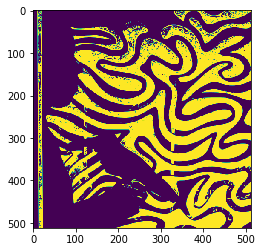

In [17]:
#plt.imshow(img[99].reshape(sizePixel1, sizePixel1)) 
plt.imshow(img[19])

In [29]:
print(1-compute_score(G_z[0]))


total
Tensor("Sum_45:0", shape=(), dtype=float32)
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`

Tensor("sub_2511:0", shape=(), dtype=float32)


In [23]:
print(G_z[0])

Tensor("strided_slice_42:0", shape=(512, 512, 1), dtype=float32)


In [25]:
print(G_z[0])


Tensor("strided_slice_44:0", shape=(512, 512, 1), dtype=float32)
